In [ ]:
import pandas  as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy  as np
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from nltk import ngrams
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import nltk
nltk.download('punkt_tab')
from bs4 import BeautifulSoup


#from nltk.tokenize import word_tokenize

import nltk
import re
import requests

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
Bank = pd.read_csv("/content/bank-full.csv")

In [ ]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
Bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
Bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
categorical_cols = Bank.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    Bank[col] = le.fit_transform(Bank[col])
    label_encoders[col] = le

In [ ]:
scaler = StandardScaler()
Bank_scaled = pd.DataFrame(scaler.fit_transform(Bank), columns=Bank.columns)


In [ ]:
wcss = []  # Within-cluster sum of squares
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(Bank_scaled)
    wcss.append(kmeans.inertia_)

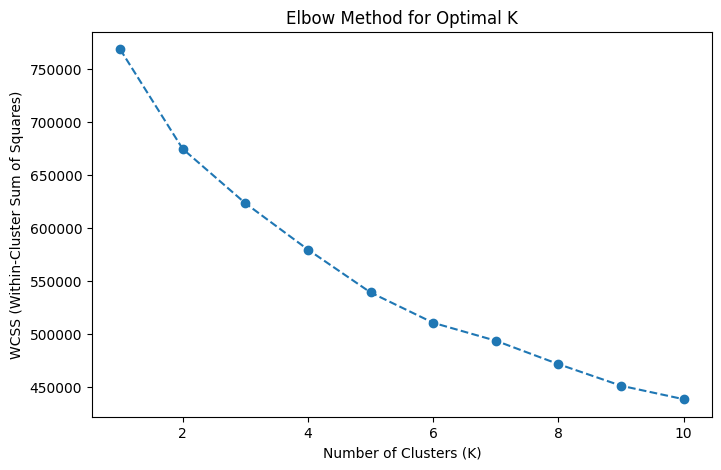

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
Bank_scaled['Cluster'] = kmeans.fit_predict(Bank_scaled)
print(Bank_scaled['Cluster'].value_counts())


Cluster
2    18680
1    18211
3     7505
0      815
Name: count, dtype: int64


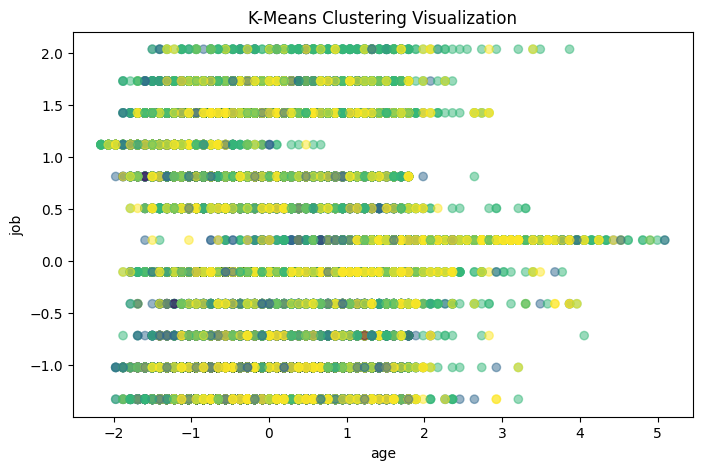

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(Bank_scaled.iloc[:, 0], Bank_scaled.iloc[:, 1], c=Bank_scaled['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel(Bank_scaled.columns[0])
plt.ylabel(Bank_scaled.columns[1])
plt.title('K-Means Clustering Visualization')
plt.show()

In [ ]:
#  silhouette_score

In [ ]:
categorical_cols = Bank.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(Bank[col])
    label_encoders[col] = le


In [ ]:
scaler = StandardScaler()
Bank_scaled = pd.DataFrame(scaler.fit_transform(Bank), columns=Bank.columns)


In [ ]:
wcss = []  # Within-cluster sum of squares
silhouette_scores = []  # Silhouette scores
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(Bank_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(Bank_scaled, cluster_labels))


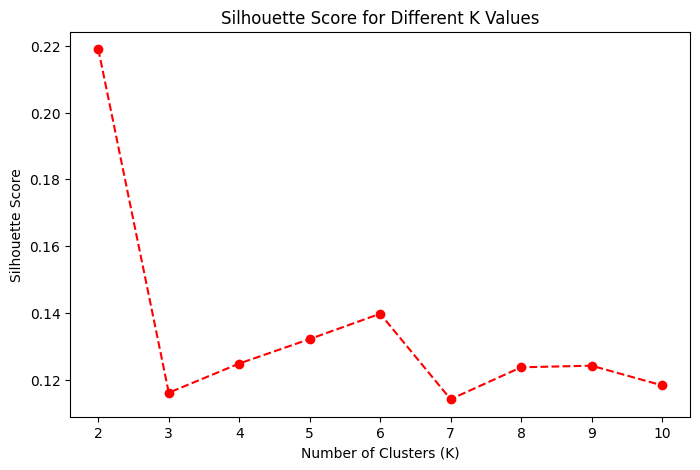

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--', color='r')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K Values')
plt.show()


In [ ]:
#  BeautifulSoup

In [ ]:
def fetch_webpage(url):
    response = requests.get("https://www.hdfcbank.com/personal/useful-links/important-messages/stayvigil/hdfc-bank-url")
    if response.status_code == 200:
        return response.text
    else:
        print(f"Failed to fetch the page. Status code: {response.status_code}")
        return None


In [ ]:
def extract_links(html):
    soup = BeautifulSoup(html, 'html.parser')
    links = []
    for link in soup.find_all('a', href=True):
        links.append(link['href'])
    return links

In [ ]:
def extract_headings(html):
    soup = BeautifulSoup(html, 'html.parser')
    headings = {
        'h1': [h1.get_text() for h1 in soup.find_all('h1')],
        'h2': [h2.get_text() for h2 in soup.find_all('h2')],
        'h3': [h3.get_text() for h3 in soup.find_all('h3')]
    }
    return headings


In [ ]:
def find_matches(pattern, text):
    matches = re.findall(pattern, text)
    return matches

# Function to substitute a pattern with a replacement string
def substitute_pattern(pattern, replacement, text):
    return re.sub(pattern, replacement, text)

In [ ]:
def validate_email(email):
    pattern = r'^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$'
    return bool(re.match(pattern, email))

# Function to extract all phone numbers from a given text
def extract_phone_numbers(text):
    pattern = r'\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}'
    return re.findall(pattern, text)


In [ ]:
def extract_urls(text):
    pattern = r'https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'
    return re.findall(pattern, text)




In [ ]:
# Example usage
if __name__ == "__main__":
    sample_text = "https://www.hdfcbank.com/personal/useful-links/important-messages/stayvigil/hdfc-bank-url Call me at (123) 456-7890."


In [ ]:
# Example usage
if __name__ == "__main__":
    sample_text = "https://www.hdfcbank.com/personal/useful-links/important-messages/stayvigil/hdfc-bank-url Call me at (123) 456-7890."

    # The print statements below were incorrectly indented
    print("Extracted Emails:", find_matches(r'\b[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+\b', sample_text))
    print("Extracted Phone Numbers:", extract_phone_numbers(sample_text))
    print("Extracted URLs:", extract_urls(sample_text))
    print("Substituted Text:", substitute_pattern(r'hdfc', 'bank', sample_text))
    print("Is valid email?", validate_email("www.hdfcbank.com"))

Extracted Emails: []
Extracted Phone Numbers: ['(123) 456-7890']
Extracted URLs: ['https://www.hdfcbank.com']
Substituted Text: https://www.bankbank.com/personal/useful-links/important-messages/stayvigil/bank-bank-url Call me at (123) 456-7890.
Is valid email? False


In [ ]:
# Stop words

In [ ]:
data = {
    'text': [
        "I love this product! It's amazing and works great.",
        "This is the worst experience I've ever had.",
        "Absolutely fantastic! Highly recommend it.",
        "Terrible! Do not buy this.",
        "It's okay, nothing special but not bad either."
    ],
    'label': ['positive', 'negative', 'positive', 'negative', 'neutral']
}


In [ ]:
Bank = pd.DataFrame(data)

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

Bank['cleaned_text'] = Bank['text'].apply(preprocess_text)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Bank['cleaned_text'], Bank['label'], test_size=0.2, random_state=42)


In [ ]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

# Training the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00       1.0
    positive       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
# World Cloud

In [ ]:
data = """
    I love programming in Python. Python is great for data science.
    Machine learning is fascinating and Python makes it easier.
    I enjoy solving problems with Python and data analytics.
"""

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

cleaned_text = preprocess_text(data)


In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='red').generate(cleaned_text)

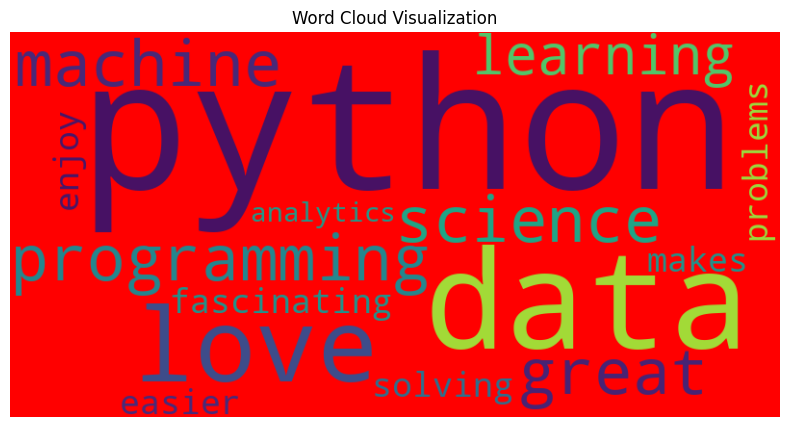

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Visualization")
plt.show()

In [ ]:
# Elbow Plot

In [ ]:
np.random.seed(42)
X = np.random.rand(100, 2) * 100

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
wcss = []  # Within-cluster sum of squares
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

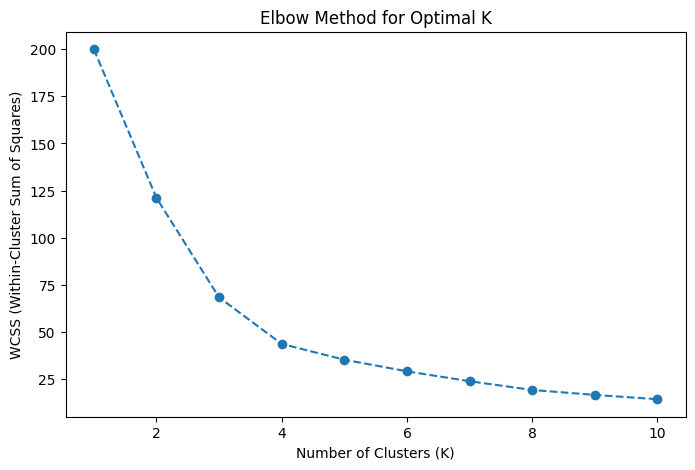

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:
#Document Term Matrix (DTM)

In [ ]:
documents = [
    "I love programming in Python",
    "Python is great for data science",
    "Machine learning is fascinating",
    "Data analytics is an important skill",
    "Python makes machine learning easier"
]

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
dtm = vectorizer.fit_transform(documents)

In [ ]:
dtm_Bank = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())

In [ ]:
print("Document-Term Matrix:")
print(dtm_Bank)

Document-Term Matrix:
   an  analytics  data  easier  fascinating  for  great  important  in  is  \
0   0          0     0       0            0    0      0          0   1   0   
1   0          0     1       0            0    1      1          0   0   1   
2   0          0     0       0            1    0      0          0   0   1   
3   1          1     1       0            0    0      0          1   0   1   
4   0          0     0       1            0    0      0          0   0   0   

   learning  love  machine  makes  programming  python  science  skill  
0         0     1        0      0            1       1        0      0  
1         0     0        0      0            0       1        1      0  
2         1     0        1      0            0       0        0      0  
3         0     0        0      0            0       0        0      1  
4         1     0        1      1            0       1        0      0  


In [ ]:
#Trigrams

In [ ]:
documents = [
    "I love programming in Python",
    "Python is great for data science",
    "Machine learning is fascinating",
    "Data analytics is an important skill",
    "Python makes machine learning easier"
]

In [ ]:
def generate_trigrams(text):
    tokens = nltk.word_tokenize(text.lower())
    trigrams = list(ngrams(tokens, 3))
    return [' '.join(trigram) for trigram in trigrams]


In [ ]:
trigram_list = []
for doc in documents:
    trigram_list.extend(generate_trigrams(doc))

In [ ]:
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(trigram_list)

In [ ]:
dtm_Bank = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())

print("Trigram Document-Term Matrix:")
print(dtm_Bank)

Trigram Document-Term Matrix:
    an  analytics  data  easier  fascinating  for  great  important  in  is  \
0    0          0     0       0            0    0      0          0   0   0   
1    0          0     0       0            0    0      0          0   1   0   
2    0          0     0       0            0    0      0          0   1   0   
3    0          0     0       0            0    0      1          0   0   1   
4    0          0     0       0            0    1      1          0   0   1   
5    0          0     1       0            0    1      1          0   0   0   
6    0          0     1       0            0    1      0          0   0   0   
7    0          0     0       0            0    0      0          0   0   1   
8    0          0     0       0            1    0      0          0   0   1   
9    0          1     1       0            0    0      0          0   0   1   
10   1          1     0       0            0    0      0          0   0   1   
11   1          0     

In [ ]:
np.random.seed(42)
data = pd.DataFrame({
    'Feature1': np.random.randn(100),
    'Feature2': np.random.randn(100) * 2,
    'Feature3': np.random.randn(100) * 3,
    'Target': np.random.choice([0, 1], size=100)
})


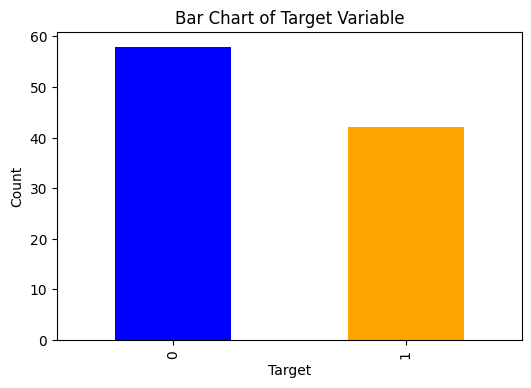

In [ ]:
# Bar Chart
plt.figure(figsize=(6, 4))
data['Target'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Bar Chart of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


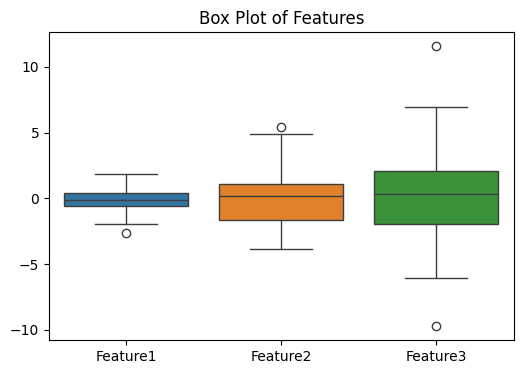

In [ ]:
# Box Plot
plt.figure(figsize=(6, 4))
sns.boxplot(data=data[['Feature1', 'Feature2', 'Feature3']])
plt.title('Box Plot of Features')
plt.show()


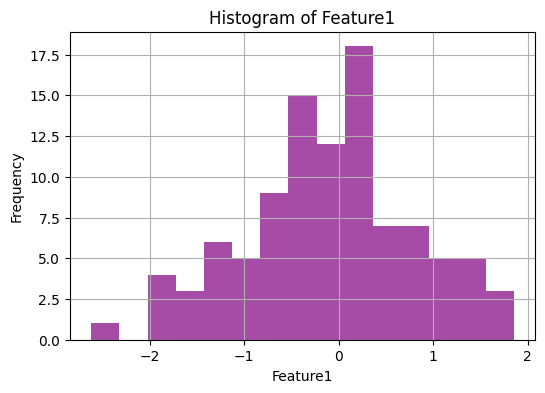

In [ ]:
# Histogram
plt.figure(figsize=(6, 4))
data['Feature1'].hist(bins=15, color='purple', alpha=0.7)
plt.title('Histogram of Feature1')
plt.xlabel('Feature1')
plt.ylabel('Frequency')
plt.show()

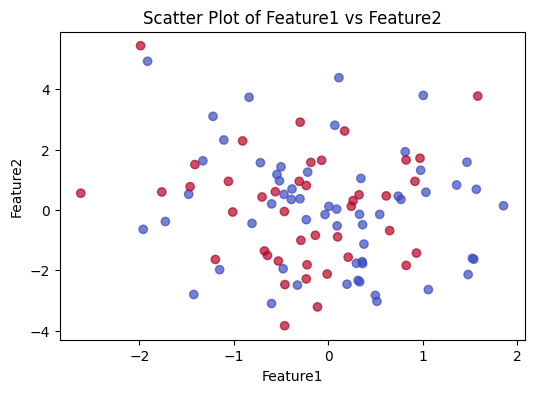

In [ ]:
# Scatter Plot
plt.figure(figsize=(6, 4))
plt.scatter(data['Feature1'], data['Feature2'], c=data['Target'], cmap='coolwarm', alpha=0.7)
plt.title('Scatter Plot of Feature1 vs Feature2')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

<Figure size 600x400 with 0 Axes>

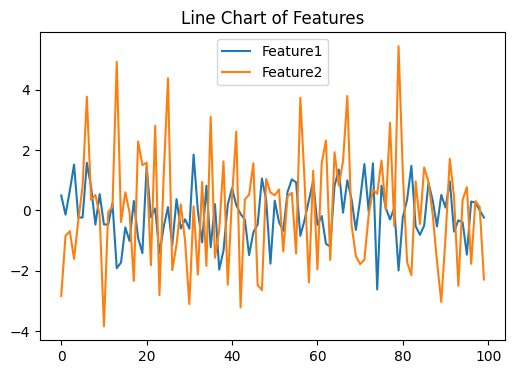

In [ ]:
# Line Chart
plt.figure(figsize=(6, 4))
data[['Feature1', 'Feature2']].plot(kind='line', figsize=(6, 4))
plt.title('Line Chart of Features')
plt.show()

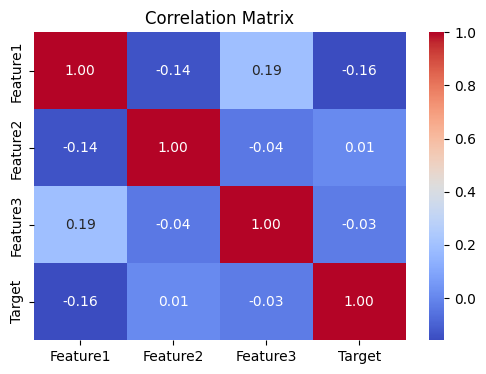

In [ ]:
# Correlation Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# ROC Curve
X_train, X_test, y_train, y_test = train_test_split(data[['Feature1', 'Feature2', 'Feature3']], data['Target'], test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

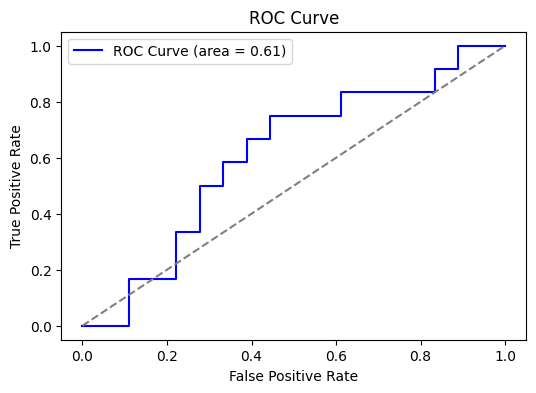

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()